In [1]:
!pip install wordcloud

In [2]:
!pip install langdetect

     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
      ------------------------------------ 20.5/981.5 kB 320.0 kB/s eta 0:00:04
     -- ---------------------------------- 71.7/981.5 kB 787.7 kB/s eta 0:00:02
     -------------------------------------  972.8/981.5 kB 7.7 MB/s eta 0:00:01
     -------------------------------------- 981.5/981.5 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993253 sha256=65c57c9883eb9da0656f8519db4b1e20fbf1157c4506a7dce8bb459553bdfe79
  Stored in directory: c:\users\naksh\appdata\local\pip\cache\wheels\0a\f2\b2\e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [3]:
!pip install sumy

  Obtaining dependency information for sumy from https://files.pythonhosted.org/packages/19/46/77859104e7c3e12dfa2e5c0e27b5dd1e14cb2409b50f9c936a48f29ceaee/sumy-0.11.0-py2.py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for pycountry>=18.2.23 from https://files.pythonhosted.org/packages/b1/ec/1fb891d8a2660716aadb2143235481d15ed1cbfe3ad669194690b0604492/pycountry-24.6.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/97.3 kB ? eta -:--:--
   ---------------------------------------- 97.3/97.3 kB 5.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.7/6.3 MB 21.4 MB/s eta 0:00:01
   -------------- ------------------------- 2.4/6.3 MB 29.8 MB/s eta 0:00:01
   -----------

In [4]:
!pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   --------------- ------------------------ 235.5/626.3 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 5.7 MB/s eta 0:00:00


In [1]:
# importing libraries
import pandas as pd
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from langdetect import detect
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer
from textblob import TextBlob

In [2]:
# reading csv file
df=pd.read_csv(r"C:\Users\Naksh\Desktop\coachxlive\Python\Udemy projects\Sentiment Analysis Project\chatgpt1.csv")
df

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871699456,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993806848,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926349312,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297256961,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570880,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,2023-01-24 06:57:56+00:00,1617778712082096128,"#ChatGPT ist ein #Chatbot, der durch künstlich...",HorstKrieger,https://twitter.com/HorstKrieger/status/161777...,https://twitter.com/HorstKrieger,"['https://lnkd.in/dzHbz5-z', 'https://lnkd.in/...","['https://t.co/qxUJZinuNO', 'https://t.co/lFZD...",0,0,0,0,1617778712082096128,de,"<a href=""http://www.linkedin.com/"" rel=""nofoll...",NaN,NaN,NaN,"['#ChatGPT', '#Chatbot,', '#KI', '#AI', '#Dial...",6
49997,2023-01-24 06:57:59+00:00,1617778726393249792,@r8r Ich hab mal die AI dazu befragt (ChatGPT)...,werpu,https://twitter.com/werpu/status/1617778726393...,https://twitter.com/werpu,NaN,NaN,0,0,0,0,1617774521586708480,de,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,"[User(username='r8r', id=15451529, displayname...",[],0
49998,2023-01-24 06:58:00+00:00,1617778728481992705,5 minuti di #chatGPT e ho capito che apprende ...,marcopiccinini,https://twitter.com/marcopiccinini/status/1617...,https://twitter.com/marcopiccinini,NaN,NaN,0,0,0,0,1617778728481992705,it,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,['#chatGPT'],1
49999,2023-01-24 06:58:01+00:00,1617778731678044162,Portland Shop Uses ChatGPT To Tell Family Stor...,EuniceNyandat,https://twitter.com/EuniceNyandat/status/16177...,https://twitter.com/EuniceNyandat,['https://drumup.io/s/DkswB6'],['https://t.co/rzGvr6yTOc'],0,0,0,0,1617778731678044162,en,"<a href=""https://drumup.io"" rel=""nofollow"">dru...",NaN,NaN,NaN,[],0


In [3]:
# creating a function t check languages
x=df['Text'][1]
lang=detect(x)
lang

'en'

In [4]:
x=df['Text'][0]
lang=detect(x)
lang

'ja'

In [5]:
# Create a function to detect a language

def det(x):
    try:
        lang=detect(x)
    except:
        lang='other'
    return lang
# call to the function
df['lang']=df['Text'].apply(det)


In [6]:
df=df.loc[df['lang']==='en']
df=df.reset_index(drop=True)
df

SyntaxError: invalid syntax (1358264882.py, line 1)

In [ ]:
df

In [ ]:
# Cleaning soe text
df['Text']=df['Text'].str.replace('http','')
df['Text']=df['Text'].str.replace('http','')
df['Text']=df['Text'].str.replace('t.co','')


In [26]:
# Developing a sentiment function

def get_sentiment(text):
    sentiment=TextBlob(text).sentiment.polarity
    
    if sentiment>0:
        return 'positive'
    elif sentiment<0:
        return 'negative'
    else:
        return 'neutral'
    
df['sentiment']=df['Text'].apply(get_sentiment)  
    
df['sentiment']   
    

0         neutral
1         neutral
2         neutral
3        negative
4         neutral
           ...   
49996     neutral
49997     neutral
49998     neutral
49999     neutral
50000     neutral
Name: sentiment, Length: 50001, dtype: object

In [27]:
df

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts,lang,sentiment
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,...,1617156270871699456,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0,ja,neutral
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,...,1617148639993806848,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0,en,neutral
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,...,1617156308926349312,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1,de,neutral
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,...,1617156332297256961,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0,en,negative
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,...,1617156345064570880,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0,tr,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,2023-01-24 06:57:56+00:00,1617778712082096128,"#ChatGPT ist ein #Chatbot, der durch künstlich...",HorstKrieger,https://twitter.com/HorstKrieger/status/161777...,https://twitter.com/HorstKrieger,"['https://lnkd.in/dzHbz5-z', 'https://lnkd.in/...","['https://t.co/qxUJZinuNO', 'https://t.co/lFZD...",0,0,...,1617778712082096128,de,"<a href=""http://www.linkedin.com/"" rel=""nofoll...",NaN,NaN,NaN,"['#ChatGPT', '#Chatbot,', '#KI', '#AI', '#Dial...",6,de,neutral
49997,2023-01-24 06:57:59+00:00,1617778726393249792,@r8r Ich hab mal die AI dazu befragt (ChatGPT)...,werpu,https://twitter.com/werpu/status/1617778726393...,https://twitter.com/werpu,NaN,NaN,0,0,...,1617774521586708480,de,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,"[User(username='r8r', id=15451529, displayname...",[],0,de,neutral
49998,2023-01-24 06:58:00+00:00,1617778728481992705,5 minuti di #chatGPT e ho capito che apprende ...,marcopiccinini,https://twitter.com/marcopiccinini/status/1617...,https://twitter.com/marcopiccinini,NaN,NaN,0,0,...,1617778728481992705,it,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,['#chatGPT'],1,it,neutral
49999,2023-01-24 06:58:01+00:00,1617778731678044162,Portland Shop Uses ChatGPT To Tell Family Stor...,EuniceNyandat,https://twitter.com/EuniceNyandat/status/16177...,https://twitter.com/EuniceNyandat,['https://drumup.io/s/DkswB6'],['https://t.co/rzGvr6yTOc'],0,0,...,1617778731678044162,en,"<a href=""https://drumup.io"" rel=""nofollow"">dru...",NaN,NaN,NaN,[],0,en,neutral


In [ ]:
# Generating a word cloud

comment_words=''
stopwords=set(STOPWORDS)

for val in df.Text:
    val=str(val)
    tokens=val.split()
    comment_words=comment_words+" ".join(tokens)+" "
    
wordcloud=WordCloud(width=900,height=500,background_color='black',
                    stopwords=stopwords,min_font_size=10).generate(comment_words)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout()
plt.show()    
    

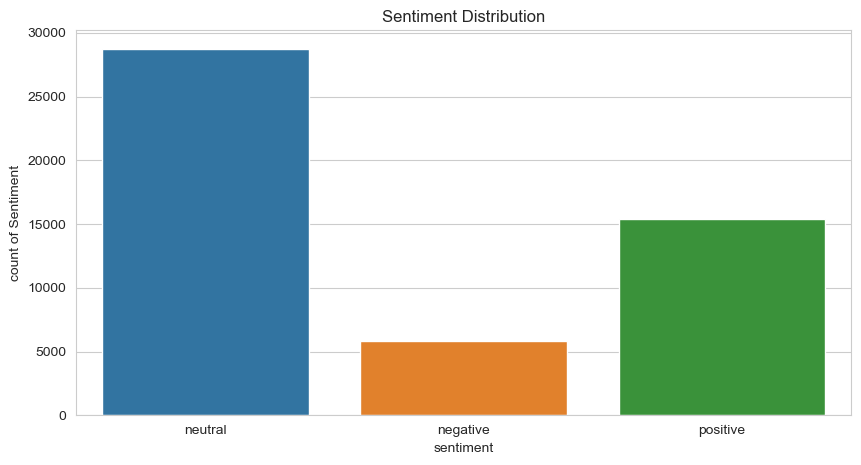

In [28]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))

sns.countplot(x='sentiment',data=df)
plt.xlabel('sentiment')
plt.ylabel('count of Sentiment')
plt.title('Sentiment Distribution')
plt.show()